In [0]:
# !curl http://files.grouplens.org/datasets/movielens/ml-100k.zip -o ml-100k.zip
# !mkdir -p imdb
# !unzip ml-100k.zip -d imdb/

In [0]:
from fastai.collab import *
from fastai.tabular import *

In [0]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [8]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
)

In [9]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 5,050      True      
______________________________________________________________________
Embedding            [50]                 5,050      True      
______________________________________________________________________
Embedding            [1]                  101        True      
______________________________________________________________________
Embedding            [1]                  101        True      
______________________________________________________________________

Total params: 10,302
Total trainable params: 10,302
Total non-trainable params: 0

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


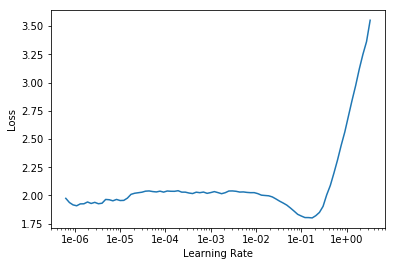

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(10, slice(5e-3))

epoch,train_loss,valid_loss,time
0,1.952643,2.005029,00:00
1,1.373435,0.758726,00:00
2,0.820263,0.690660,00:00
3,0.659006,0.659090,00:00
4,0.556926,0.644034,00:00
5,0.475328,0.638074,00:00
6,0.400659,0.636526,00:00
7,0.351642,0.634138,00:00
8,0.320626,0.634587,00:00
9,0.307598,0.634134,00:00


In [13]:
path = Path('imdb/ml-100k/')
path.ls()

[PosixPath('imdb/ml-100k/ua.base'),
 PosixPath('imdb/ml-100k/u2.test'),
 PosixPath('imdb/ml-100k/u.occupation'),
 PosixPath('imdb/ml-100k/mku.sh'),
 PosixPath('imdb/ml-100k/u4.test'),
 PosixPath('imdb/ml-100k/ua.test'),
 PosixPath('imdb/ml-100k/README'),
 PosixPath('imdb/ml-100k/u2.base'),
 PosixPath('imdb/ml-100k/u1.test'),
 PosixPath('imdb/ml-100k/u3.base'),
 PosixPath('imdb/ml-100k/u5.base'),
 PosixPath('imdb/ml-100k/ub.base'),
 PosixPath('imdb/ml-100k/u.item'),
 PosixPath('imdb/ml-100k/u1.base'),
 PosixPath('imdb/ml-100k/u.data'),
 PosixPath('imdb/ml-100k/u.info'),
 PosixPath('imdb/ml-100k/ub.test'),
 PosixPath('imdb/ml-100k/allbut.pl'),
 PosixPath('imdb/ml-100k/u3.test'),
 PosixPath('imdb/ml-100k/u.genre'),
 PosixPath('imdb/ml-100k/u4.base'),
 PosixPath('imdb/ml-100k/u5.test'),
 PosixPath('imdb/ml-100k/u.user')]

In [14]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names = [user, item, 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None, 
                     names = [item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [16]:
len(ratings)

100000

In [17]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [19]:
data.show_batch()

userId,title,target
542,"Brady Bunch Movie, The (1995)",3.0
151,Ruby in Paradise (1993),1.0
774,Terminator 2: Judgment Day (1991),2.0
592,Marvin's Room (1996),3.0
42,Star Trek VI: The Undiscovered Country (1991),4.0


In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


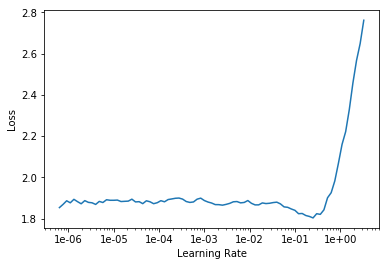

In [22]:
learn.lr_find()
learn.recorder.plot()

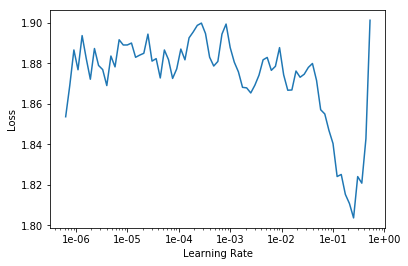

In [23]:
learn.recorder.plot(skip_end=15)

In [25]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.380582,0.871719,00:08
1,0.550064,0.874048,00:08
2,0.508229,0.862483,00:08
3,0.377469,0.861998,00:08
4,0.272506,0.862756,00:08


In [0]:
learn.save('dotprod')

In [0]:
learn.load('dotprod');

In [28]:

learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1654, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [30]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [31]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [33]:
sorted(movie_ratings, key=lambda o:o[0])[:15]

[(tensor(-0.4821),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3650),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3382), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3249), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.3218), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3179), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.3161), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2964), 'Tales from the Hood (1995)', 2.037037037037037),
 (tensor(-0.2950), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2935), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2913), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2891), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2679), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2661), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2658), 'Speed 2: Cruise Co

In [34]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6298), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.6270), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.6109), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.6108), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5890), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5888), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5812), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5784), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5695), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5639), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.5424), "One Flew Over the Cuckoo's Nest (1975)", 4.291666666666667),
 (tensor(0.5350), 'Apt Pupil (1998)', 4.1),
 (tensor(0.5173), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5047), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.5024), 'Vertigo (1958)', 4.251396648044692)]

In [35]:

movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

In [36]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [38]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0210), 'Chinatown (1974)'),
 (tensor(1.0157), 'Godfather, The (1972)'),
 (tensor(1.0082), 'Fargo (1996)'),
 (tensor(1.0020), 'Casablanca (1942)'),
 (tensor(0.9704), 'Lawrence of Arabia (1962)'),
 (tensor(0.9542), 'Close Shave, A (1995)'),
 (tensor(0.9421),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9224), 'Wrong Trousers, The (1993)'),
 (tensor(0.9196), 'Lone Star (1996)'),
 (tensor(0.9137), 'Ran (1985)')]

In [39]:
sorted(movie_comp, key=itemgetter(0), reverse=False)[:10]

[(tensor(-1.1880), 'Jungle2Jungle (1997)'),
 (tensor(-1.1453), 'Home Alone 3 (1997)'),
 (tensor(-1.1236), "McHale's Navy (1997)"),
 (tensor(-1.0413), 'Congo (1995)'),
 (tensor(-0.9960), 'Batman & Robin (1997)'),
 (tensor(-0.9801), 'Leave It to Beaver (1997)'),
 (tensor(-0.9744), 'Bio-Dome (1996)'),
 (tensor(-0.9006), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-0.8907), 'D3: The Mighty Ducks (1996)'),
 (tensor(-0.8802), 'Speed 2: Cruise Control (1997)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [41]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2902), 'Braveheart (1995)'),
 (tensor(1.0449), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.0393), 'Titanic (1997)'),
 (tensor(0.9571), 'Forrest Gump (1994)'),
 (tensor(0.9389), "It's a Wonderful Life (1946)"),
 (tensor(0.8867), 'Hunt for Red October, The (1990)'),
 (tensor(0.8782), 'Field of Dreams (1989)'),
 (tensor(0.8382), "Mr. Holland's Opus (1995)"),
 (tensor(0.8378), 'Back to the Future (1985)'),
 (tensor(0.8288), 'American President, The (1995)')]

In [42]:
sorted(movie_comp, key=itemgetter(0), reverse=False)[:10]

[(tensor(-0.8336), 'Trainspotting (1996)'),
 (tensor(-0.8314), 'Keys to Tulsa (1997)'),
 (tensor(-0.7665), 'Brazil (1985)'),
 (tensor(-0.7455), 'Serial Mom (1994)'),
 (tensor(-0.7313), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7264), 'Cable Guy, The (1996)'),
 (tensor(-0.7242), 'Dead Man (1995)'),
 (tensor(-0.7026), 'Heavenly Creatures (1994)'),
 (tensor(-0.7013), 'Dracula: Dead and Loving It (1995)'),
 (tensor(-0.6920), 'Boogie Nights (1997)')]

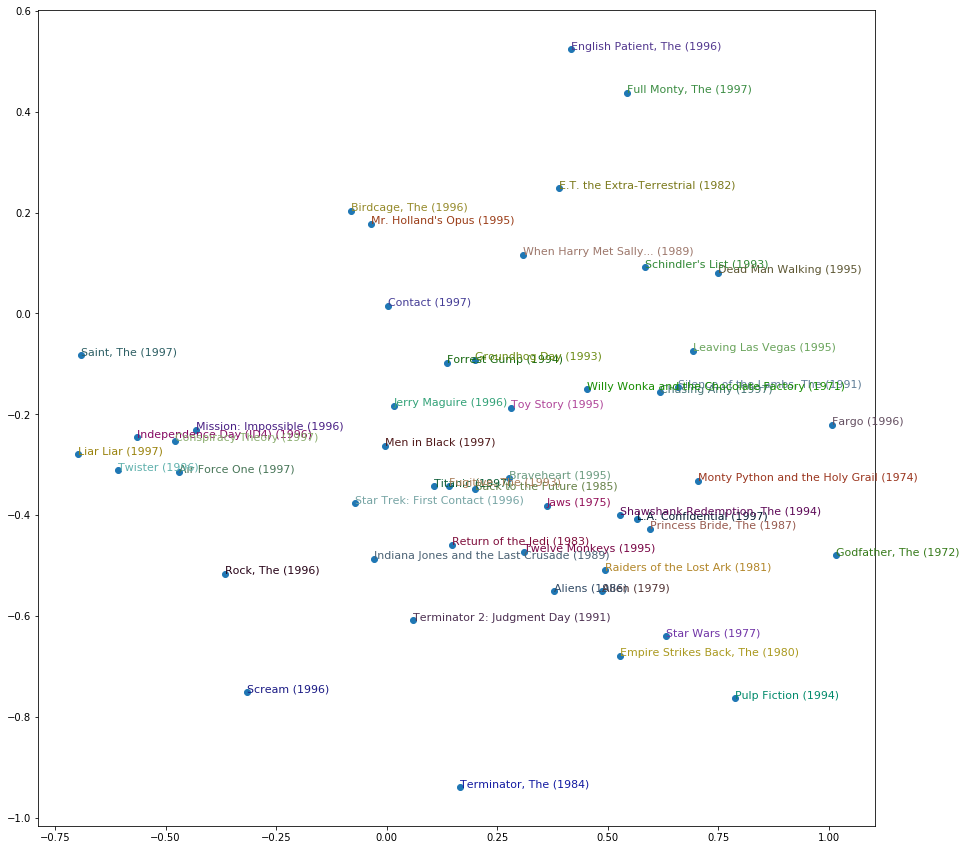

In [43]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()